<a href="https://colab.research.google.com/github/Dhruvin3103/sem6/blob/master/ml/dt_suv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [52]:
df = pd.read_csv("https://raw.githubusercontent.com/Dhruvin3103/ML/main/CSV/suv_data.csv")
df.head(4)
df = df.dropna()
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [62]:
import numpy as np
import pandas as pd

class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.tree = self._build_tree(X, y, depth=0)


    def _build_tree(self, X, y, depth):
        # print(depth)
        num_samples, num_features = X.shape
        unique_classes = np.unique(y)

        # Check stopping criteria
        if len(unique_classes) == 1:
            return {'class': unique_classes[0]}
        if depth == self.max_depth:
            return {'class': self._most_common_class(y)}

        # Find the best split
        best_gini = float('inf')
        best_split = None
        best_left_y = None
        best_right_y = None

        for feature_index in range(num_features):
            feature_values = np.unique(X[:, feature_index])
            for value in feature_values:
                left_mask = X[:, feature_index] <= value
                right_mask = ~left_mask

                left_y = y[left_mask]
                right_y = y[right_mask]

                gini = self._calculate_gini(left_y, right_y)
                if gini < best_gini:
                    best_gini = gini
                    best_split = (feature_index, value)
                    best_left_y = left_y
                    best_right_y = right_y
        # print(best_gini)
        # Recursive call for left and right subtrees
        # if best_gini == 0.0:
        #     print({'class': self._most_common_class(y)})
        #     return {'class': self._most_common_class(y)}
        print(best_split,X)
        print(best_left_y,best_left_y,'best_attributes')
        left_subtree = self._build_tree(X[best_left_y], best_left_y, depth + 1)
        right_subtree = self._build_tree(X[best_right_y], best_right_y, depth + 1)
        # print('hi')
        print({'feature_index': best_split[0],
                'threshold': best_split[1],
                'left': left_subtree,
                'right': right_subtree})

        return {'feature_index': best_split[0],
                'threshold': best_split[1],
                'left': left_subtree,
                'right': right_subtree}

    def _calculate_gini(self, left_y, right_y):
        total_samples = len(left_y) + len(right_y)
        p_left = len(left_y) / total_samples
        p_right = len(right_y) / total_samples
        gini_left = 1.0 - sum([(np.sum(left_y == c) / len(left_y))**2 for c in np.unique(left_y)])
        gini_right = 1.0 - sum([(np.sum(right_y == c) / len(right_y))**2 for c in np.unique(right_y)])
        gini = p_left * gini_left + p_right * gini_right
        return gini

    def _most_common_class(self, y):
        return np.bincount(y).argmax()

    def predict(self, X):
        return np.array([self._predict_tree(sample, self.tree) for sample in X])

    def _predict_tree(self, sample, tree):
        if 'class' in tree:
            return tree['class']
        else:
            if sample[tree['feature_index']] <= tree['threshold']:
                return self._predict_tree(sample, tree['left'])
            else:
                return self._predict_tree(sample, tree['right'])

# df_encoded = pd.get_dummies(df, columns=['Gender'], drop_first=True)
X = df[['Age', 'EstimatedSalary', 'Gender']].values
Y = df['Purchased'].values
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state=42)
tree = DecisionTree(max_depth=3)
tree.fit(X_train, Y_train)

predictions = tree.predict(X_test)


(0, 42) [[29 75000 'Male']
 [38 80000 'Female']
 [45 26000 'Male']
 [54 108000 'Female']
 [46 23000 'Male']
 [23 28000 'Female']
 [37 75000 'Male']
 [42 65000 'Male']
 [35 71000 'Female']
 [51 146000 'Female']
 [39 96000 'Male']
 [24 89000 'Female']
 [58 95000 'Female']
 [25 22000 'Male']
 [41 59000 'Male']
 [28 89000 'Male']
 [42 80000 'Female']
 [42 108000 'Female']
 [46 96000 'Female']
 [47 113000 'Female']
 [33 28000 'Female']
 [19 25000 'Male']
 [49 89000 'Male']
 [31 15000 'Female']
 [30 79000 'Female']
 [48 141000 'Male']
 [32 117000 'Female']
 [37 71000 'Female']
 [18 86000 'Female']
 [42 79000 'Female']
 [27 84000 'Female']
 [40 65000 'Male']
 [57 74000 'Male']
 [26 15000 'Female']
 [26 80000 'Female']
 [29 43000 'Male']
 [33 149000 'Female']
 [39 42000 'Male']
 [54 104000 'Female']
 [36 33000 'Male']
 [46 32000 'Female']
 [40 142000 'Female']
 [37 62000 'Female']
 [29 148000 'Male']
 [37 57000 'Female']
 [35 50000 'Male']
 [42 53000 'Female']
 [35 38000 'Male']
 [41 30000 'Fe

In [63]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score #
print(confusion_matrix(Y_test,predictions))
print(accuracy_score(Y_test,predictions)*100)

[[33 40]
 [ 1 46]]
65.83333333333333


[Text(0.5, 0.8333333333333334, 'x[0] <= 42.5\ngini = 0.459\nsamples = 400\nvalue = [257, 143]'),
 Text(0.25, 0.5, 'x[1] <= 90500.0\ngini = 0.271\nsamples = 285\nvalue = [239, 46]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.072\nsamples = 241\nvalue = [232, 9]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.268\nsamples = 44\nvalue = [7, 37]'),
 Text(0.75, 0.5, 'x[0] <= 46.5\ngini = 0.264\nsamples = 115\nvalue = [18, 97]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.444\nsamples = 24\nvalue = [8, 16]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.196\nsamples = 91\nvalue = [10, 81]')]

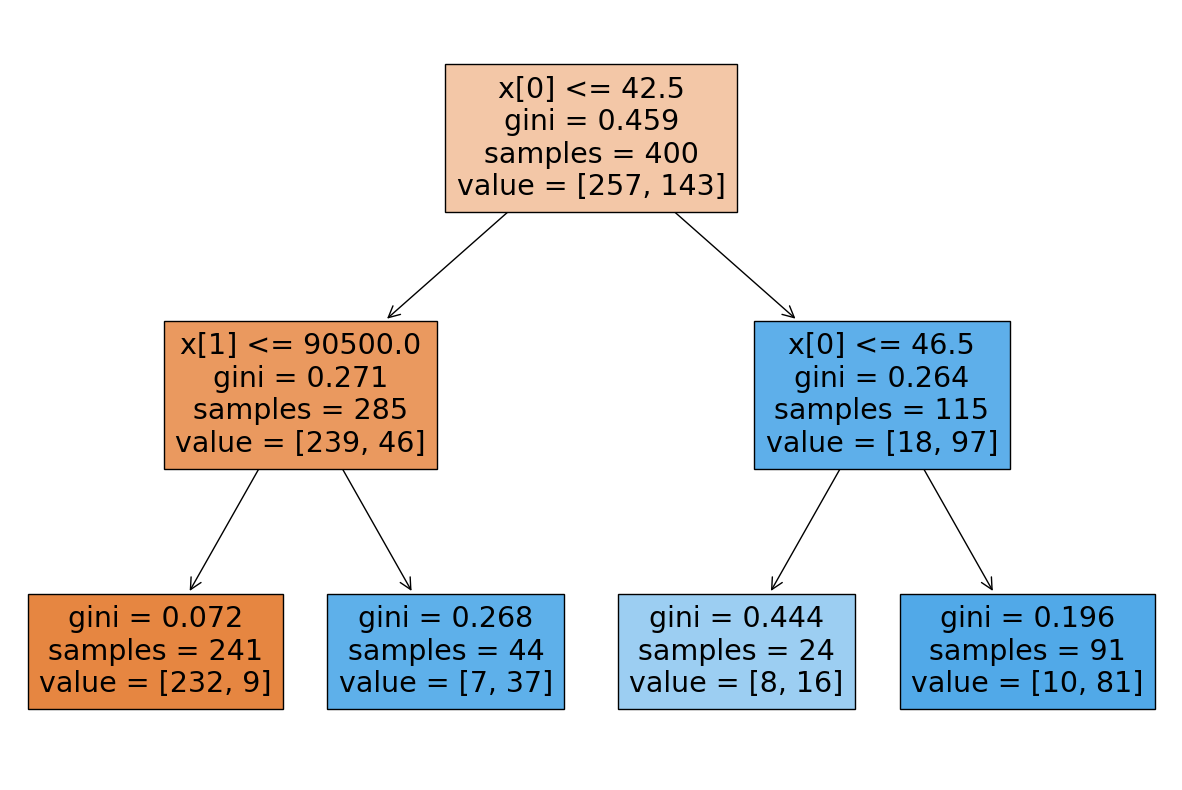

In [67]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import pandas as pd

df_encoded = pd.get_dummies(df, columns=['Gender'], drop_first=True)
X = df_encoded[['Age', 'EstimatedSalary', 'Gender_Male']].values
y = df['Purchased'].values
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X, y)
plt.figure(figsize=(15,10))
plot_tree(tree,filled=True)

In [56]:
Y = df["Purchased"]
Y
X = df